In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [1]:
#from google.colab import files
#files.upload()

In [ ]:
weather_data = pd.read_csv('weatherAUS.csv')

In [ ]:
weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
weather_data.shape

(145460, 23)

In [ ]:
weather_data.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
weather_data = weather_data.dropna()

In [ ]:
weather_data.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [ ]:
print(weather_data['RainTomorrow'].unique())

['No' 'Yes']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


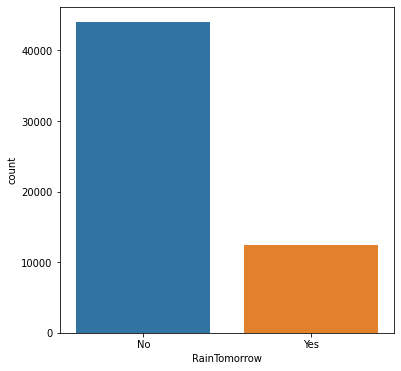

MinTemp             AxesSubplot(0.125,0.749828;0.133621x0.130172)
MaxTemp          AxesSubplot(0.285345,0.749828;0.133621x0.130172)
Rainfall          AxesSubplot(0.44569,0.749828;0.133621x0.130172)
Evaporation      AxesSubplot(0.606034,0.749828;0.133621x0.130172)
Sunshine         AxesSubplot(0.766379,0.749828;0.133621x0.130172)
WindGustSpeed       AxesSubplot(0.125,0.593621;0.133621x0.130172)
WindSpeed9am     AxesSubplot(0.285345,0.593621;0.133621x0.130172)
WindSpeed3pm      AxesSubplot(0.44569,0.593621;0.133621x0.130172)
Humidity9am      AxesSubplot(0.606034,0.593621;0.133621x0.130172)
Humidity3pm      AxesSubplot(0.766379,0.593621;0.133621x0.130172)
Pressure9am         AxesSubplot(0.125,0.437414;0.133621x0.130172)
Pressure3pm      AxesSubplot(0.285345,0.437414;0.133621x0.130172)
Cloud9am          AxesSubplot(0.44569,0.437414;0.133621x0.130172)
Cloud3pm         AxesSubplot(0.606034,0.437414;0.133621x0.130172)
Temp9am          AxesSubplot(0.766379,0.437414;0.133621x0.130172)
Temp3pm   

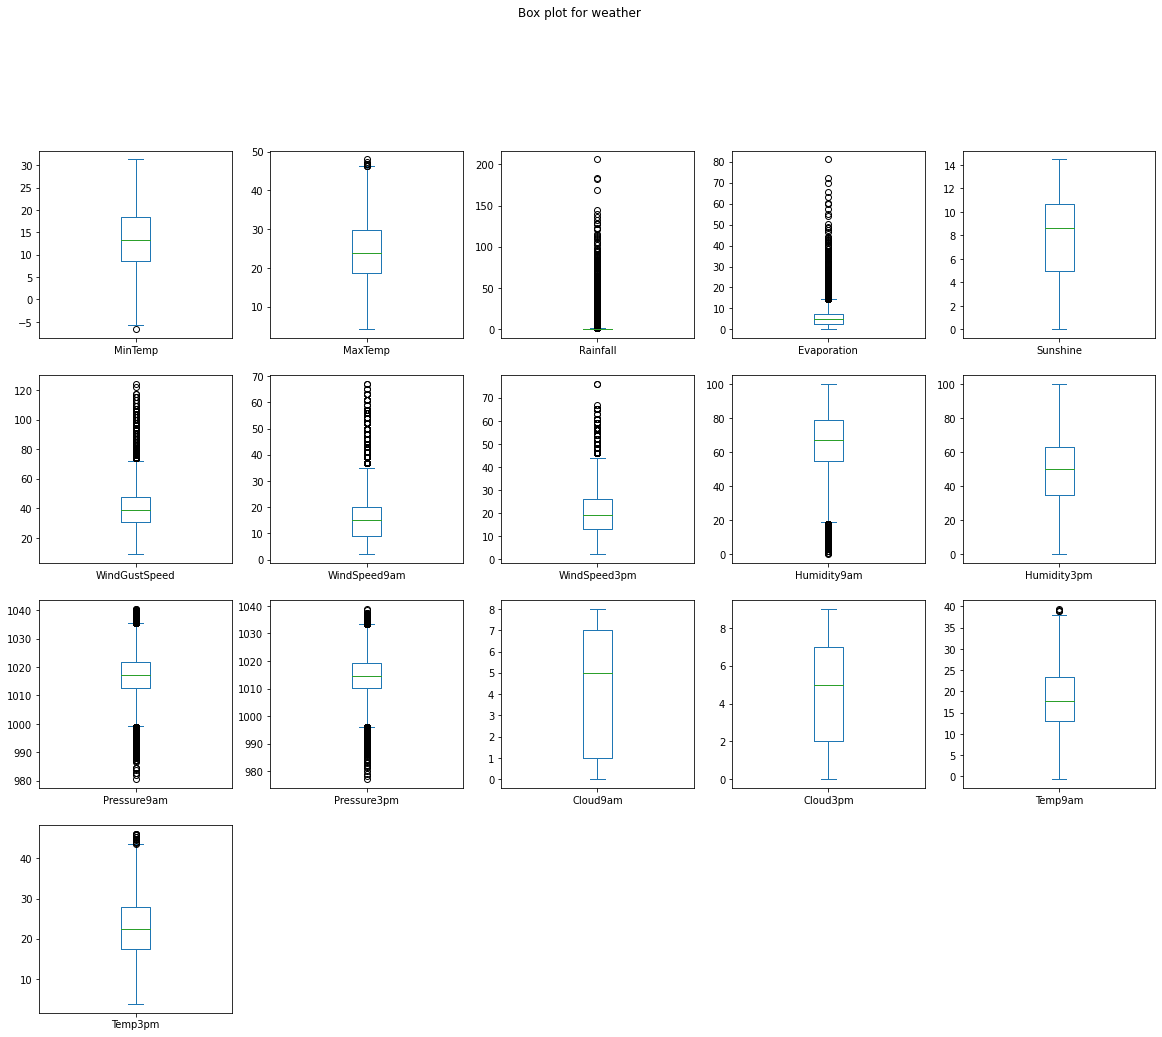

In [ ]:
import seaborn as sns
plt.figure(figsize = (6, 6))
sns.countplot(weather_data['RainTomorrow'], label = 'RainTomorrow')
plt.show()
weather_data.drop('RainTomorrow', axis = 1).plot(kind = 'box', subplots = True, layout = (5, 5), sharex = False, sharey = False, figsize = (20, 20), title = 'Box plot for weather')

<Figure size 432x288 with 0 Axes>

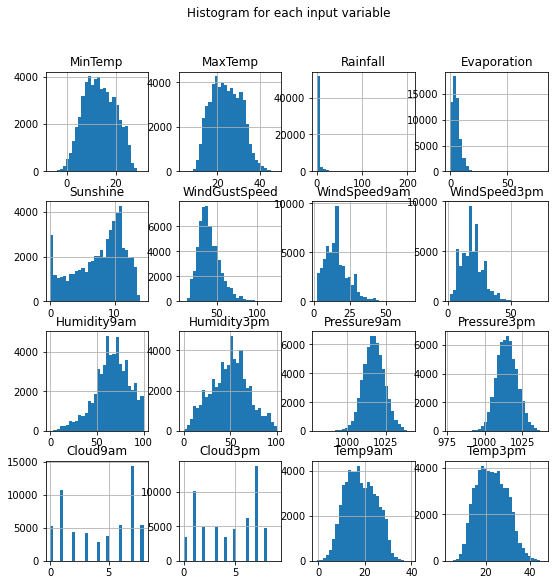

In [ ]:
plt.savefig('Weather')
plt.show()
import pylab as pl
weather_data.drop('RainTomorrow', axis = 1).hist(bins = 30, figsize = (9, 9))
pl.suptitle('Histogram for each input variable')
plt.savefig('Histogram')
plt.show()


In [ ]:
weather_data.replace({"RainTomorrow": {'Yes': 0, 'No': 1}}, inplace = True)
weather_data.replace({"RainToday": {'Yes': 0, 'No': 1}}, inplace = True)

In [ ]:
X = weather_data.drop(columns = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], axis = 1)
feature_names = ['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine','RainToday', 'RainTomorrow']
X = weather_data[feature_names]
Y = weather_data['RainTomorrow']

In [ ]:
print(X)

        MinTemp  MaxTemp  Rainfall  Sunshine  RainToday  RainTomorrow
6049       17.9     35.2       0.0      12.3          1             1
6050       18.4     28.9       0.0      13.0          1             1
6052       19.4     37.6       0.0      10.6          1             1
6053       21.9     38.4       0.0      12.2          1             1
6054       24.2     41.0       0.0       8.4          1             1
...         ...      ...       ...       ...        ...           ...
142298     19.3     33.4       0.0      11.0          1             1
142299     21.2     32.6       0.0       8.6          1             1
142300     20.7     32.8       0.0      11.0          1             1
142301     19.5     31.8       0.0      10.6          1             1
142302     20.2     31.7       0.0      10.7          1             1

[56420 rows x 6 columns]


In [ ]:
print(Y)

6049      1
6050      1
6052      1
6053      1
6054      1
         ..
142298    1
142299    1
142300    1
142301    1
142302    1
Name: RainTomorrow, Length: 56420, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, Y_train)
print('Accuracy of logistic regression classifier on training set: {:2f}'
            .format(lr.score(X_train, Y_train)))
print('Accuracy of logistic regression classifier on testing set: {:2f}'
            .format(lr.score(X_test, Y_test)))

Accuracy of logistic regression classifier on training set: 1.000000
Accuracy of logistic regression classifier on testing set: 1.000000


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
print('Accuracy of Decision Tree classifier on training set: {:2f}'
            .format(dtc.score(X_train, Y_train)))
print('Accuracy of Decision Tree classifier on testing set: {:2f}'
            .format(dtc.score(X_test, Y_test)))

Accuracy of Decision Tree classifier on training set: 1.000000
Accuracy of Decision Tree classifier on testing set: 1.000000


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
print('Accuracy of KNeighbors classifier on training set: {:2f}'
            .format(knn.score(X_train, Y_train)))
print('Accuracy of KNeighbors classifier on testing set: {:2f}'
            .format(knn.score(X_test, Y_test)))

Accuracy of KNeighbors classifier on training set: 1.000000
Accuracy of KNeighbors classifier on testing set: 1.000000


In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
print('Accuracy of GNB classifier on training set: {:2f}'
            .format(gnb.score(X_train, Y_train)))
print('Accuracy of GNB classifier on testing set: {:2f}'
            .format(gnb.score(X_test, Y_test)))

Accuracy of GNB classifier on training set: 1.000000
Accuracy of GNB classifier on testing set: 1.000000


In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, Y_train)
print('Accuracy of SVM classifier on training set: {:2f}'
            .format(svm.score(X_train, Y_train)))
print('Accuracy of SVM classifier on testing set: {:2f}'
            .format(svm.score(X_test, Y_test)))

Accuracy of SVM classifier on training set: 1.000000
Accuracy of SVM classifier on testing set: 1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


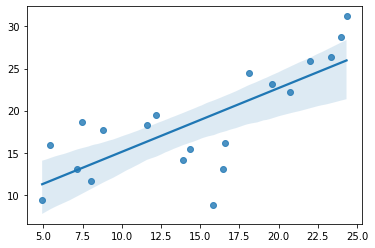

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Generate some random data
num_points = 20
# x will be 5, 6, 7... but also twiddled randomly
x = 5 + np.arange(num_points) + np.random.randn(num_points)
# y will be 10, 11, 12... but twiddled even more randomly
y = 10 + np.arange(num_points) + 5 * np.random.randn(num_points)
sns.regplot(x, y)
plt.show()

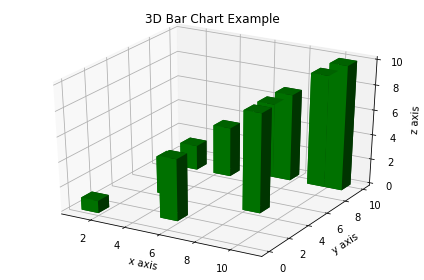

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = np.random.randint(10, size=10)
z = np.zeros(10)

dx = np.ones(10)
dy = np.ones(10)
dz = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

ax.bar3d(x, y, z, dx, dy, dz, color='g')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
plt.title("3D Bar Chart Example")
plt.tight_layout()
plt.show()

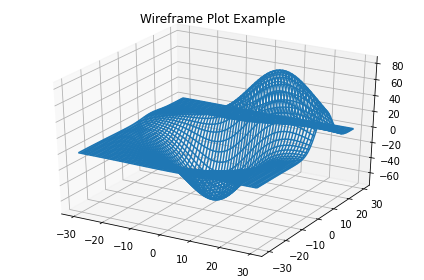

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x, y, z = axes3d.get_test_data()

ax.plot_wireframe(x, y, z, rstride = 2, cstride = 2)

plt.title("Wireframe Plot Example")
plt.tight_layout()
plt.show()